Assignment 2
Abijith Suresh KM
8899968


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

1. Loading Data


In [67]:
heartData = pd.read_csv("./heart.csv")
heartData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [68]:
heartData.info() # Get the Data Set details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [69]:
# Check if there is any Null values
heartData.isnull().values.any()

False

Observation : There is no Null values

2. Remove Outliers

In [70]:
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(heartData.select_dtypes(include=['int64', 'float64'])))

filter_con = (z_scores < 3).all(axis=1)

# Remove outliers
heartData = heartData[filter_con]

heartData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Outliers are removed

3. Converting Text columns to numbers using Label Encoder

In [71]:
# text columns
categories = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Do label encoding
labelEncoder = LabelEncoder()
for col in categories:heartData[col] = labelEncoder.fit_transform(heartData[col])
   
heartData.head(10)

C:\Users\Abi's Lap\AppData\Local\Temp\ipykernel_12296\2724256065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for col in categories:heartData[col] = labelEncoder.fit_transform(heartData[col])
C:\Users\Abi's Lap\AppData\Local\Temp\ipykernel_12296\2724256065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for col in categories:heartData[col] = labelEncoder.fit_transform(heartData[col])
C:\Users\Abi's Lap\AppData\Local\Temp\ipykernel_12296\2724256065.py:6: SettingWithCopyWarning: 
A value is trying 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


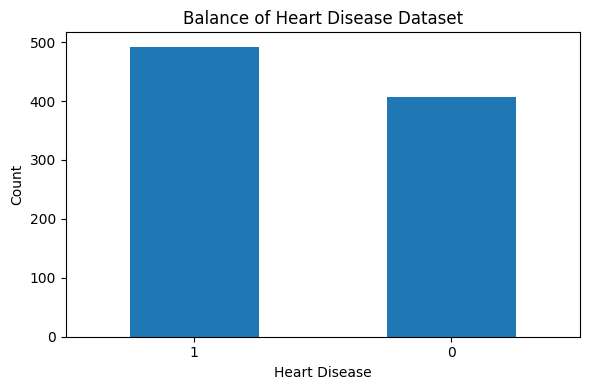

In [72]:

plt.figure(figsize=(6, 4))

x = heartData['HeartDisease'].value_counts()
x.plot(kind='bar')

plt.title("Balance of Heart Disease Dataset")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

There is difference between having Heart disease and Not having Heart Disease

4. Scaling


In [73]:
scaler = StandardScaler()
# Splitting the data
X = heartData.drop('HeartDisease', axis=1)
y = heartData['HeartDisease']

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)\

print(X)
print(y)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG   
0     40    1              1        140          289          0           1  \
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

5. Machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the poerformance

In [74]:
# Standalone Model
svm_standalone_model = SVC(kernel='linear')
svm_standalone_model.fit(X_train, y_train)
y_pred_svm_standalone_model = svm_standalone_model.predict(X_test)


In [75]:
# SVM Bagging model
svm_bagging_model = BaggingClassifier(estimator=SVC(kernel='linear'),
                                  n_estimators=500, max_samples=0.8,
                                  oob_score=True, 
                                  random_state=16)
svm_bagging_model.fit(X_train, y_train)
y_pred_svm_bagging_model = svm_bagging_model.predict(X_test)


SVM Comparison

In [76]:
print("Accuracy" , accuracy_score(y_test, y_pred_svm_standalone_model))
print("Recall" ,recall_score(y_test, y_pred_svm_standalone_model))
print("Precision" ,precision_score(y_test, y_pred_svm_standalone_model))
print("F1 score" ,f1_score(y_test, y_pred_svm_standalone_model))


Accuracy 0.8611111111111112
Recall 0.9468085106382979
Precision 0.8165137614678899
F1 score 0.8768472906403939


In [77]:
print("Accuracy" , accuracy_score(y_test, y_pred_svm_bagging_model))
print("Recall" ,recall_score(y_test, y_pred_svm_bagging_model))
print("Precision" ,precision_score(y_test, y_pred_svm_bagging_model))
print("F1 score" ,f1_score(y_test, y_pred_svm_bagging_model))


Accuracy 0.8666666666666667
Recall 0.9468085106382979
Precision 0.8240740740740741
F1 score 0.8811881188118812


From the Accuracy ,Precision and  F1 Score Bagging Model shows better perfomance than the SVM model

6. Use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance



In [78]:
dt_standalone_model = DecisionTreeClassifier(random_state=42)
dt_standalone_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [79]:
y_pred_dt_standalone_model = dt_standalone_model.predict(X_test)
dt_bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=0.8, 
    oob_score=True,
    random_state=16
)
dt_bagging_model.fit(X_train, y_train)
y_pred_dt_bagging_model = dt_bagging_model.predict(X_test)



Comparison Between DTS and Bagging 

In [80]:
print("Accuracy" , accuracy_score(y_test, y_pred_dt_standalone_model))
print("Recall" ,recall_score(y_test, y_pred_dt_standalone_model))
print("Precision" ,precision_score(y_test, y_pred_dt_standalone_model))
print("F1 score" ,f1_score(y_test, y_pred_dt_standalone_model))

Accuracy 0.7888888888888889
Recall 0.7659574468085106
Precision 0.8181818181818182
F1 score 0.7912087912087913


In [81]:
print("Accuracy" , accuracy_score(y_test, y_pred_dt_bagging_model))
print("Recall" ,recall_score(y_test, y_pred_dt_bagging_model))
print("Precision" ,precision_score(y_test, y_pred_dt_bagging_model))
print("F1 score" ,f1_score(y_test, y_pred_dt_bagging_model))

Accuracy 0.8611111111111112
Recall 0.8936170212765957
Precision 0.8484848484848485
F1 score 0.8704663212435233


Decision Tree Classifier Bagging Model performs better

Observations:
Considering the performance metrics from the four models, incorporating bagging appears to be a prudent choice when juxtaposing SVMs with Decision Tree models, particularly in scenarios involving intricate or noisy datasets. Bagging introduces a heightened level of reliability and resilience to the Decision Tree model, adeptly handling the intricacies and uncertainties present in the dataset through an amalgamation of models trained on diverse data subsets. It serves as a pivotal technique for elevating the effectiveness and robustness of machine learning models, especially when confronted with challenging data circumstances.